In [9]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import glob

In [39]:
secs_per_year = 31536000
colors = ['red','#332288', '#88CCEE', '#117733', '#999933', '#661100']

In [194]:
def GetRates(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2)
        mask_g = (data_g['preds'][net1] >= cut1) & (data_g['preds'][net2] >= cut2)

    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2)
        mask_g = (data_g['preds'][net1] >= cut1) & (data_g['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2)
        mask_g = (data_g['preds'][net1] <= cut1) & (data_g['preds'][net2] >= cut2)
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2)
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2)
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2)
        mask_g = (data_g['preds'][net1] <= cut1) & (data_g['preds'][net2] <= cut2)
       

    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
    rate_c = np.sum(data_c['weight_val'][mask_c]*secs_per_year)
    rate_g = np.sum(data_g['weight_val'][mask_g]*secs_per_year)
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c]*secs_per_year)))
    rate_g_err = np.sqrt(np.sum(np.square(data_g['weight_val'][mask_g]*secs_per_year)))
    
    print("corsika events ", data_c['weight_val'][mask_c].shape)
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))
    print("MuonGun =   {0:.3f} +/- {1:.3f}".format(rate_g,rate_g_err))

def GetRatesM(Name,cut1,cut2,net1,net2,sign1,sign2,mask_t0,mask_m0,mask_e0,mask_c0,mask_g0):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] >= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] >= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0
        mask_g = (data_g['preds'][net1] >= cut1) & (data_g['preds'][net2] >= cut2) & mask_g0
    elif (sign1 == "more"):
        mask_t = (data_t['preds'][net1] >= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] >= cut1) & (data_m['preds'][net2] <= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] >= cut1) & (data_e['preds'][net2] <= cut2) & mask_e0
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0
        mask_g = (data_g['preds'][net1] >= cut1) & (data_g['preds'][net2] <= cut2) & mask_g0
    elif (sign2 == "more"):
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] >= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] >= cut2) & mask_m0
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] >= cut2) & mask_e0 
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2) & mask_c0 
        mask_g = (data_g['preds'][net1] <= cut1) & (data_g['preds'][net2] >= cut2) & mask_g0 
    else:
        mask_t = (data_t['preds'][net1] <= cut1) & (data_t['preds'][net2] <= cut2) & mask_t0
        mask_m = (data_m['preds'][net1] <= cut1) & (data_m['preds'][net2] <= cut2) & mask_m0 
        mask_e = (data_e['preds'][net1] <= cut1) & (data_e['preds'][net2] <= cut2) & mask_e0 
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2) & mask_c0 
        mask_g = (data_g['preds'][net1] <= cut1) & (data_g['preds'][net2] <= cut2) & mask_g0 


    rate_t = np.sum(data_t['weight_val'][mask_t]) 
    rate_m = np.sum(data_m['weight_val'][mask_m]) 
    rate_e = np.sum(data_e['weight_val'][mask_e])
    rate_c = np.sum(data_c['weight_val'][mask_c]*secs_per_year)
    rate_g = np.sum(data_g['weight_val'][mask_g]*secs_per_year)
   
    rate_t_err = np.sqrt(np.sum(np.square(data_t['weight_val'][mask_t]))) 
    rate_m_err = np.sqrt(np.sum(np.square(data_m['weight_val'][mask_m])))
    rate_e_err = np.sqrt(np.sum(np.square(data_e['weight_val'][mask_e])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c]*secs_per_year)))
    rate_g_err = np.sqrt(np.sum(np.square(data_g['weight_val'][mask_g]*secs_per_year)))
    print("corsika events ",data_c['weight_val'][mask_c].shape)
   
    print(Name)
  
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_t,rate_t_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_m,rate_m_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_e,rate_e_err))
    print("Corsika =   {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))
    print("MuonGun =   {0:.3f} +/- {1:.3f}".format(rate_g,rate_g_err))

def PlotW2(Name,Label,data_t,data_m,data_e,data_c,data_g,weight_t,weight_m,weight_e,weight_c,weight_g,\
    xscale='linear',b =200,r =[0,1], loc =8):
    colors = ['red','#332288', '#88CCEE', '#117733', '#999933', '#661100']
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#MuonGun '+str(len(data_g)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_ylim(10**(-5),10**(4))
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, weights = weight_t, histtype = 'step',edgecolor = colors[0], lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, weights = weight_m, histtype = 'step',edgecolor =colors[1], lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, weights = weight_e, histtype = 'step',edgecolor =colors[3], lw =2, range = r, label = "NuECC")  
    ax.hist(data_c, bins =b, weights = weight_c, histtype = 'step',edgecolor =colors[5], lw =2, range = r, label = "Corsika")  
    ax.hist(data_g, bins =b, weights = weight_g, histtype = 'step',edgecolor =colors[4], lw =2, range = r, label = "MuonGun")  
    plt.legend(loc=loc)
    
def Scatter2dCuts(data_t1,data_t2,data_m1,data_m2,data_e1,data_e2,data_c1,data_c2,data_g1,data_g2,
                  l1=[0,1],l2=[0,1], label1 ="label",label2="label"):
  #  fig, ax = plt.subplots(figsize=(10,10),facecolor ='w')
    contain = 0 #10
    b = 420 #400
    m = 1/3 #-1./3.
    bottomz = -200 #-200
    bottome = 5 #75
    #plt.subplot(1,4,4)
    x = np.linspace(contain,500,10)
    y = x*m+b
    
    fig, ax = plt.subplots(nrows=1, ncols=3,sharex = True,sharey=True, figsize=(20,7),facecolor ='w')
    plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

#     plt.subplot(1,5,1)
#     ax1 = plt.gca()
#     ax1.set_xlim(l1)
#     ax1.set_ylim(l2)
#     ax1.set_title('Single')
#     plt.vlines(contain,bottomz,b,'k')
#     plt.vlines(bottome,-500,bottomz,'k')
#     plt.hlines(bottomz,contain,bottome,'k')
#     ax1.plot(x,y,'k')
#     plt.scatter(data_e1,data_e2, c = colors[3], s =0.5)
#     plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
#     plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
#     ax1.tick_params(axis='both', which='major', labelsize=10)
#     ax1.tick_params(axis='both', which='minor', labelsize=8)

#     plt.subplot(1,5,2)
#     ax2 = plt.gca()
#     ax2.set_xlim(l1)
#     ax2.set_ylim(l2)
#     ax2.set_title('Track')
#     plt.vlines(contain,bottomz,b,'k')
#     plt.vlines(bottome,-500,bottomz,'k')
#     plt.hlines(bottomz,contain,bottome,'k')
#     ax2.plot(x,y,'k')
#     plt.scatter(data_m1,data_m2, c = colors[1], s =0.5)
#     plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
#     #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
#     ax2.tick_params(axis='both', left = False, labelleft = False, which='major', labelsize=10)
#     ax2.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,3,1)
    ax3 = plt.gca()
    ax3.set_xlim(l1)
    ax3.set_ylim(l2)
    ax3.set_title('Double')
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax3.plot(x,y,'k')
    plt.scatter(data_t1,data_t2, c = colors[0], s =0.5)
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax3.tick_params(axis='both', left = True,  labelleft = True, which='major', labelsize=10)
    ax3.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,3,2)
    ax4 = plt.gca()
    ax4.set_xlim(l1)
    ax4.set_ylim(l2)
    ax4.set_title('Corsika')
    plt.scatter(data_c1,data_c2, c = colors[5], s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax4.plot(x,y,'k')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax4.tick_params(axis='both', left = False,  labelleft = False, which='major', labelsize=10)
    ax4.tick_params(axis='both', which='minor', labelsize=8)

    plt.subplot(1,3,3)
    ax5 = plt.gca()
    ax5.set_xlim(l1)
    ax5.set_ylim(l2)
    ax5.set_title('MuonGun')
    plt.scatter(data_g1,data_g2, c = colors[4], s =0.5)
    plt.vlines(contain,bottomz,b,'k')
    plt.vlines(bottome,-500,bottomz,'k')
    plt.hlines(bottomz,contain,bottome,'k')
    ax5.plot(x,y,'k')
    plt.xlabel(label1,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    #plt.ylabel(label2,  fontdict={'fontsize': 16, 'fontweight': 'medium'})
    ax5.tick_params(axis='both', left = False,  labelleft = False,  which='major', labelsize=10)
    ax5.tick_params(axis='both', which='minor', labelsize=8)

    plt.show()

In [201]:
data_t = np.load('/fastio2/dasha/double_pulse/data_CC_NuTau_1_1.npy',mmap_mode='r')
data_m = np.load('/fastio2/dasha/double_pulse/data_CC_NuMu_1_1.npy',mmap_mode='r')
data_e = np.load('/fastio2/dasha/double_pulse/data_CC_NuE_1_1.npy',mmap_mode='r')
data_c = np.load('/fastio2/dasha/double_pulse/dataCC_CNN_corsika.npy',mmap_mode='r')
data_g = np.load('/fastio2/dasha/double_pulse/data_MuonGun_21315.npy', mmap_mode='r')

In [202]:
print(data_c.shape)

(164841,)


In [167]:
N1 = 0.99
N2 = 0.8
masks_t = (data_t['preds']['n1'] >= N1) & (data_t['preds']['n3'] >= N2)
masks_m = (data_m['preds']['n1'] >= N1) & (data_m['preds']['n3'] >= N2)
masks_e = (data_e['preds']['n1'] >= N1) & (data_e['preds']['n3'] >= N2)
masks_c = (data_c['preds']['n1'] >= N1) & (data_c['preds']['n3'] >= N2)
masks_g = (data_g['preds']['n1'] >= N1) & (data_g['preds']['n3'] >= N2)
print(masks_t.shape)

(55521,)


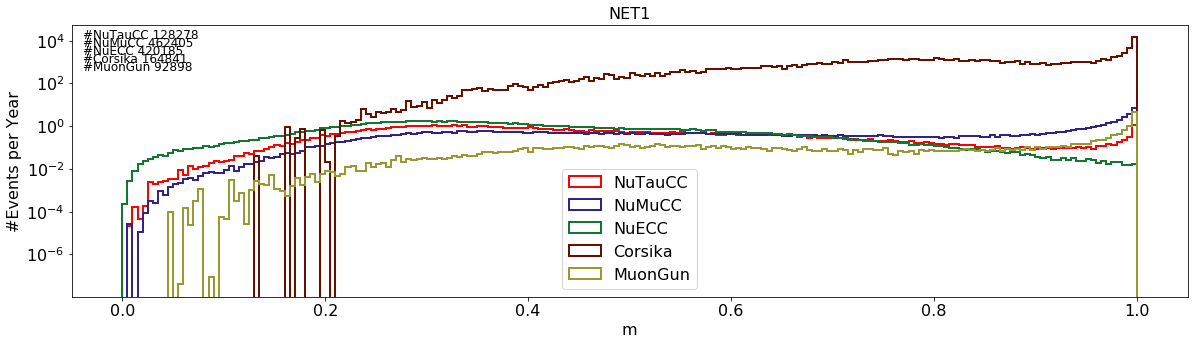

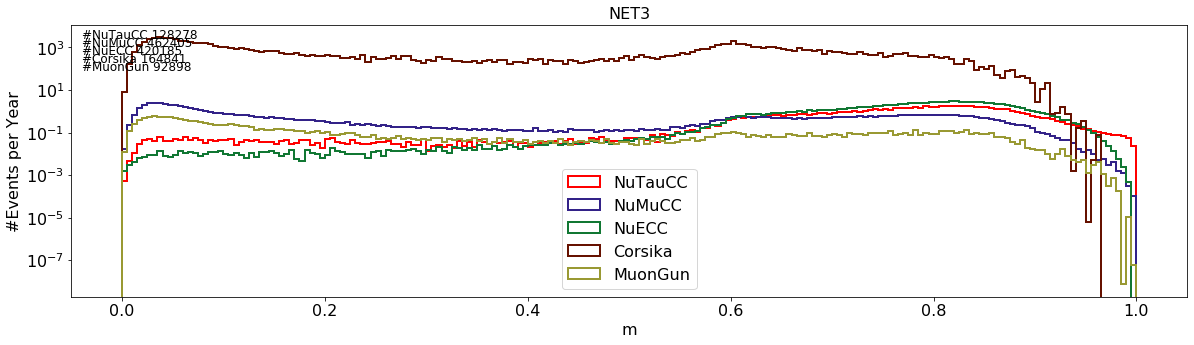

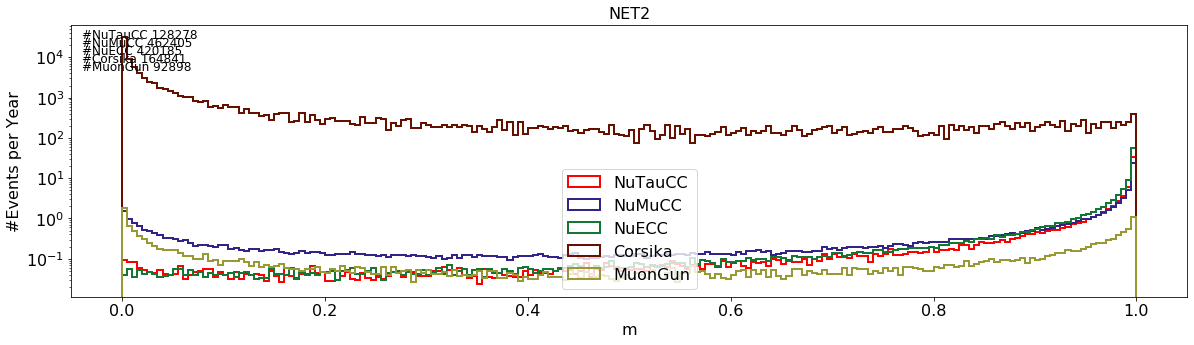

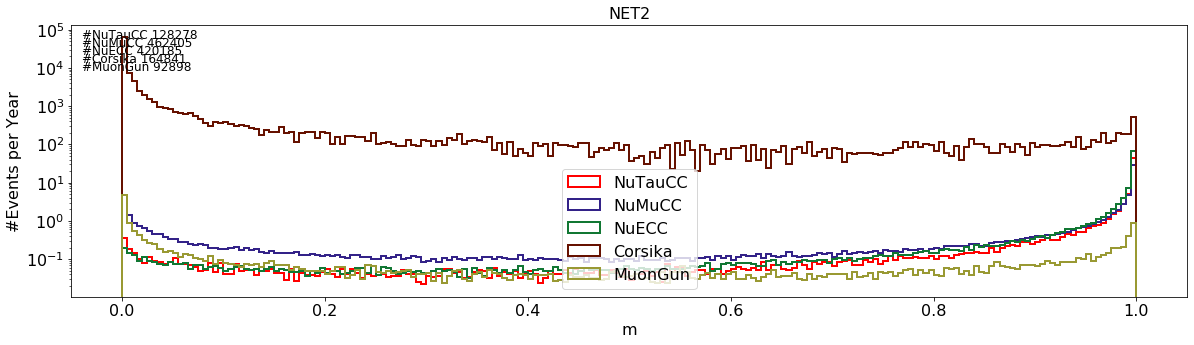

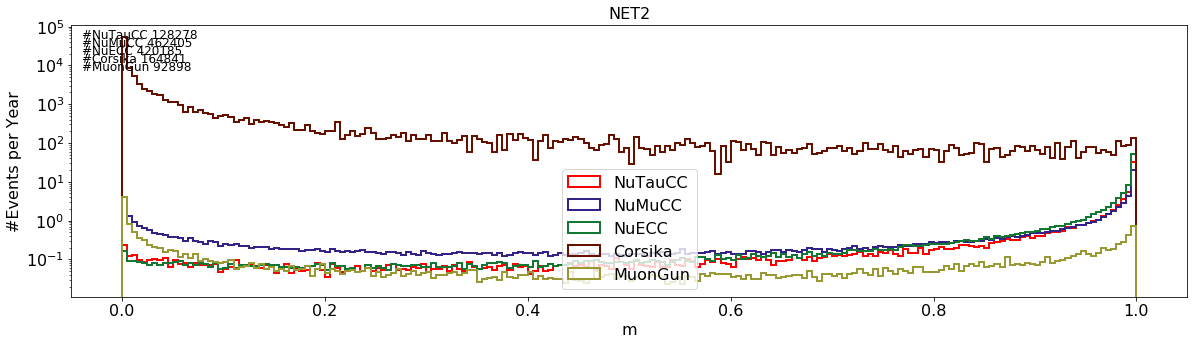

In [120]:
PlotW2("NET1", "m", data_t['preds']['n1'],data_m['preds']['n1'],data_e['preds']['n1'],data_c['preds']['n1'],data_g['preds']['n1'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =200)
PlotW2("NET3", "m", data_t['preds']['n3'],data_m['preds']['n3'],data_e['preds']['n3'],data_c['preds']['n3'],data_g['preds']['n3'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =200)
PlotW2("NET2", "m", data_t['preds']['n2_1'],data_m['preds']['n2_1'],data_e['preds']['n2_1'],data_c['preds']['n2_1'],data_g['preds']['n2_1'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =200)
PlotW2("NET2", "m", data_t['preds']['n2_2'],data_m['preds']['n2_2'],data_e['preds']['n2_2'],data_c['preds']['n2_2'],data_g['preds']['n2_2'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =200)
PlotW2("NET2", "m", data_t['preds']['n2_3'],data_m['preds']['n2_3'],data_e['preds']['n2_3'],data_c['preds']['n2_3'],data_g['preds']['n2_3'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =200)

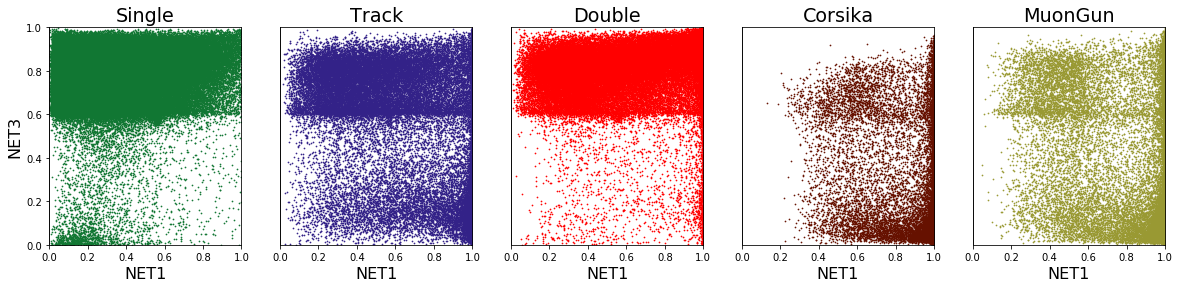

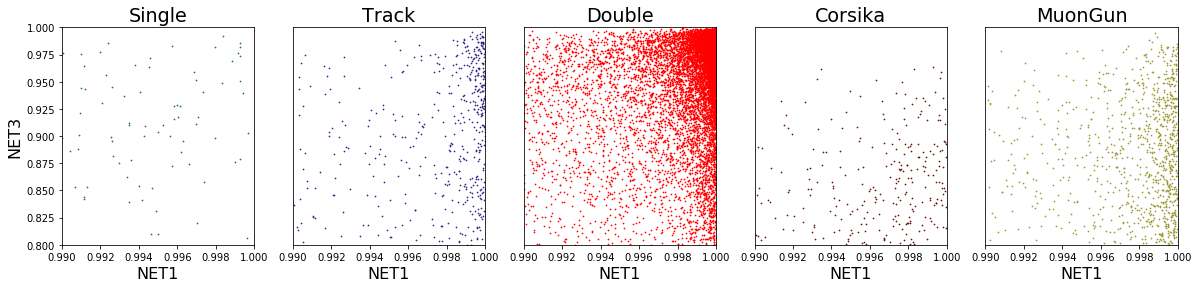

In [168]:
Scatter2dCuts(data_t['preds']['n1'],data_t['preds']['n3'],\
          data_m['preds']['n1'],data_m['preds']['n3'],\
          data_e['preds']['n1'],data_e['preds']['n3'],\
          data_c['preds']['n1'],data_c['preds']['n3'],\
          data_g['preds']['n1'],data_g['preds']['n3'],\
          l1=[0,1],l2=[0,1], label2 ="NET3",label1="NET1")

Scatter2dCuts(data_t['preds']['n1'][masks_t],data_t['preds']['n3'][masks_t],\
          data_m['preds']['n1'][masks_m],data_m['preds']['n3'][masks_m],\
          data_e['preds']['n1'][masks_e],data_e['preds']['n3'][masks_e],\
          data_c['preds']['n1'][masks_c],data_c['preds']['n3'][masks_c],\
          data_g['preds']['n1'][masks_g],data_g['preds']['n3'][masks_g],\
          l1=[0.99,1],l2=[0.8,1], label2 ="NET3",label1="NET1")

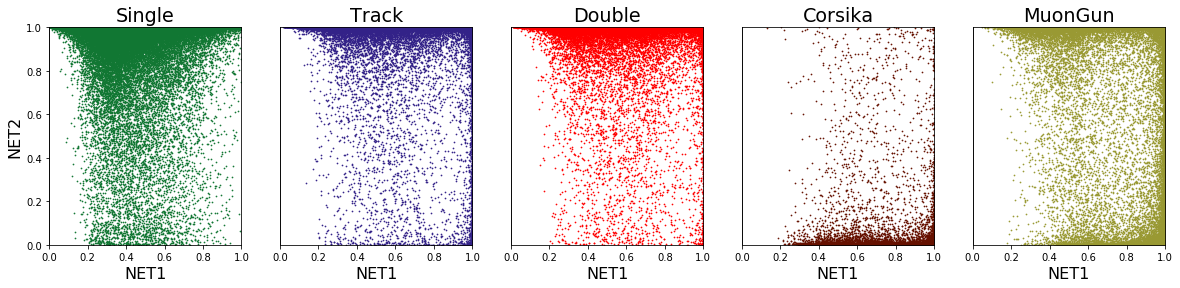

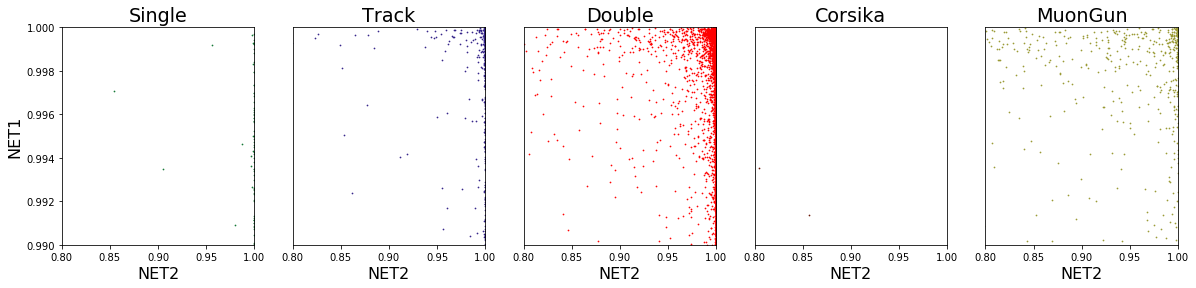

In [171]:
Scatter2dCuts(data_t['preds']['n1'],data_t['preds']['n2_3'],\
          data_m['preds']['n1'],data_m['preds']['n2_3'],\
          data_e['preds']['n1'],data_e['preds']['n2_3'],\
          data_c['preds']['n1'],data_c['preds']['n2_3'],\
          data_g['preds']['n1'],data_g['preds']['n2_3'],\
          l1=[0,1],l2=[0,1], label2 ="NET2",label1="NET1")

Scatter2dCuts(data_t['preds']['n2_3'][masks_t],data_t['preds']['n1'][masks_t],\
          data_m['preds']['n2_3'][masks_m],data_m['preds']['n1'][masks_m],\
          data_e['preds']['n2_3'][masks_e],data_e['preds']['n1'][masks_e],\
          data_c['preds']['n2_3'][masks_c],data_c['preds']['n1'][masks_c],\
          data_g['preds']['n2_3'][masks_g],data_g['preds']['n1'][masks_g],\
          l1=[0.8,1],l2=[0.99,1], label2 ="NET1",label1="NET2")

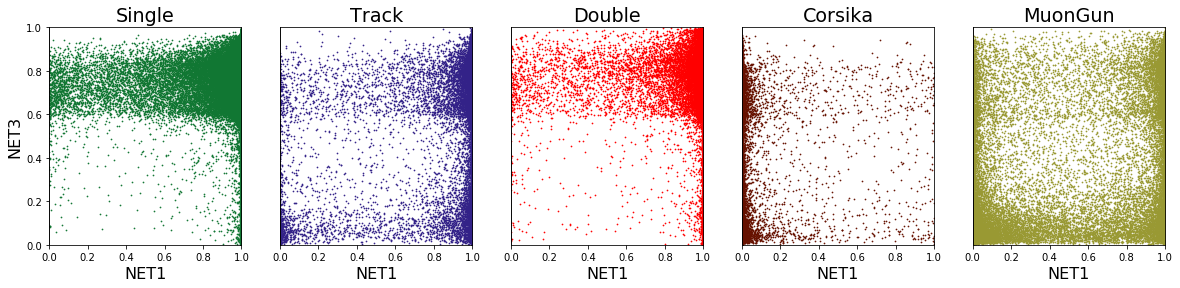

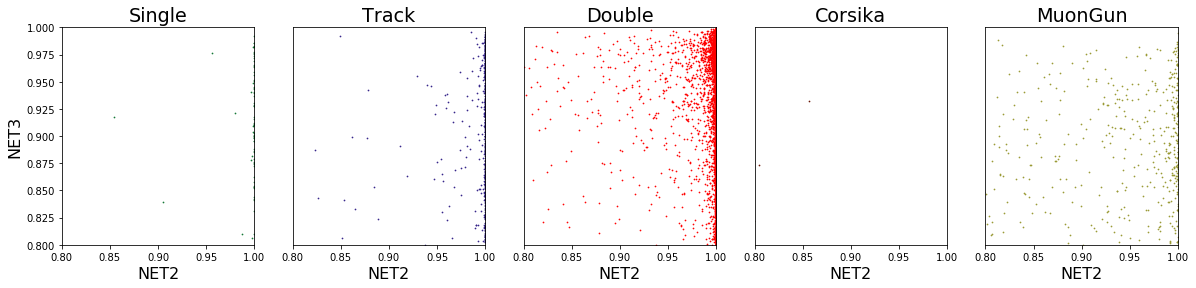

In [173]:
Scatter2dCuts(data_t['preds']['n2_3'],data_t['preds']['n3'],\
          data_m['preds']['n2_3'],data_m['preds']['n3'],\
          data_e['preds']['n2_3'],data_e['preds']['n3'],\
          data_c['preds']['n2_3'],data_c['preds']['n3'],\
          data_g['preds']['n2_3'],data_g['preds']['n3'],\
          l1=[0,1],l2=[0,1], label2 ="NET3",label1="NET1")

Scatter2dCuts(data_t['preds']['n2_3'][masks_t],data_t['preds']['n3'][masks_t],\
          data_m['preds']['n2_3'][masks_m],data_m['preds']['n3'][masks_m],\
          data_e['preds']['n2_3'][masks_e],data_e['preds']['n3'][masks_e],\
          data_c['preds']['n2_3'][masks_c],data_c['preds']['n3'][masks_c],\
          data_g['preds']['n2_3'][masks_g],data_g['preds']['n3'][masks_g],\
          l1=[0.8,1],l2=[0.8,1], label2 ="NET3",label1="NET2")

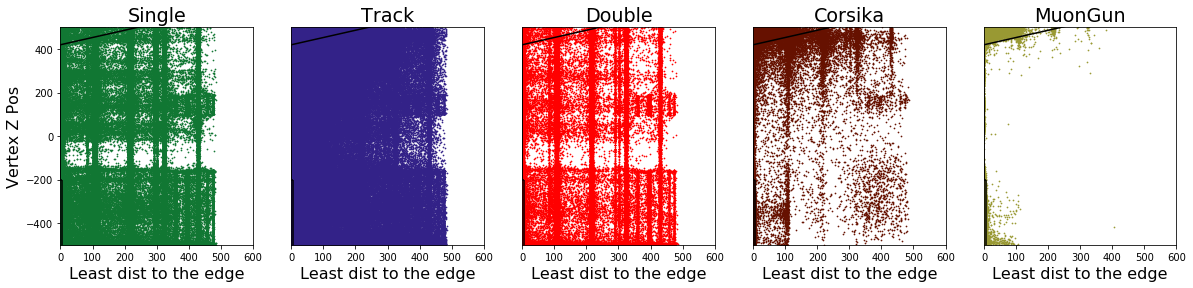

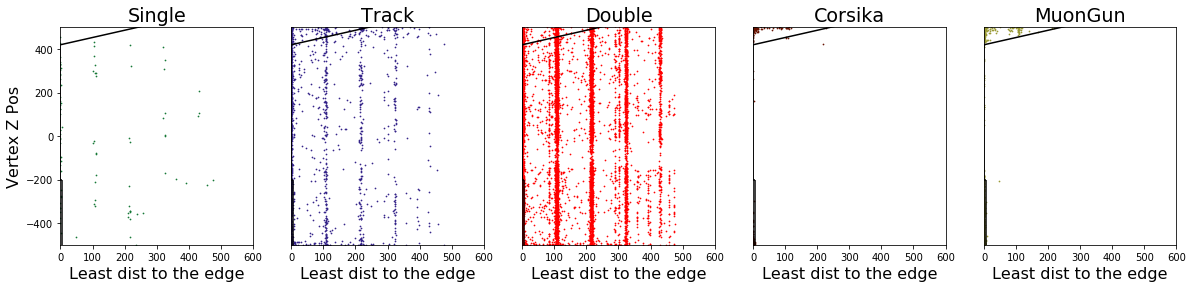

In [115]:
Scatter2dCuts(data_t['logan_veto']['LeastDistanceToPolygon_Veto'],data_t['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_m['logan_veto']['LeastDistanceToPolygon_Veto'],data_m['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_e['logan_veto']['LeastDistanceToPolygon_Veto'],data_e['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_c['logan_veto']['LeastDistanceToPolygon_Veto'],data_c['logan_veto']['VHESelfVetoVertexPosZ'],\
          data_g['logan_veto']['LeastDistanceToPolygon_Veto'],data_g['logan_veto']['VHESelfVetoVertexPosZ'],\
          l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")
Scatter2dCuts(data_t['logan_veto']['LeastDistanceToPolygon_Veto'][masks_t],data_t['logan_veto']['VHESelfVetoVertexPosZ'][masks_t],\
          data_m['logan_veto']['LeastDistanceToPolygon_Veto'][masks_m],data_m['logan_veto']['VHESelfVetoVertexPosZ'][masks_m],\
          data_e['logan_veto']['LeastDistanceToPolygon_Veto'][masks_e],data_e['logan_veto']['VHESelfVetoVertexPosZ'][masks_e],\
          data_c['logan_veto']['LeastDistanceToPolygon_Veto'][masks_c],data_c['logan_veto']['VHESelfVetoVertexPosZ'][masks_c],\
          data_g['logan_veto']['LeastDistanceToPolygon_Veto'][masks_g],data_g['logan_veto']['VHESelfVetoVertexPosZ'][masks_g],\
          l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")

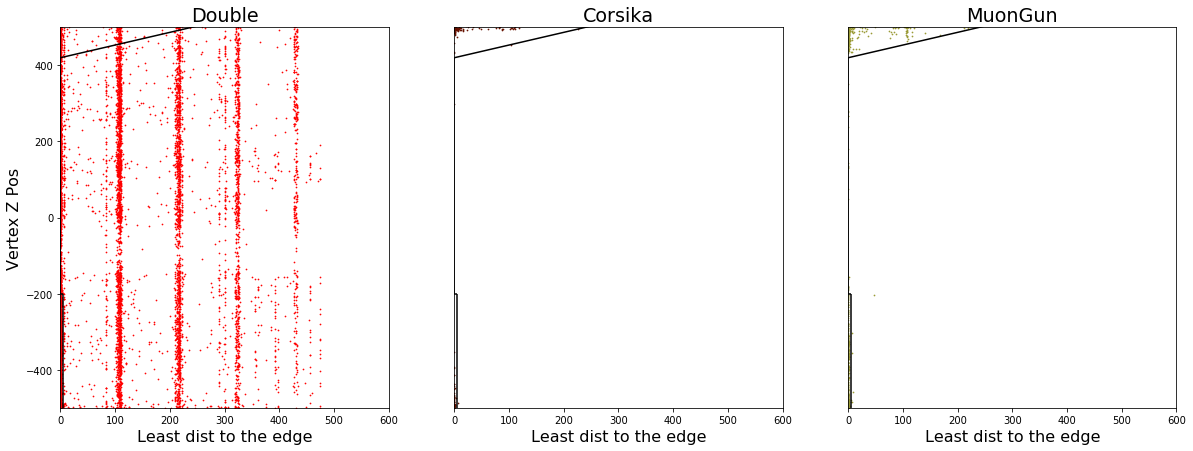

In [196]:
Scatter2dCuts(data_t['logan_veto']['LeastDistanceToPolygon_Veto'][masks_t],data_t['logan_veto']['VHESelfVetoVertexPosZ'][masks_t],\
          data_m['logan_veto']['LeastDistanceToPolygon_Veto'][masks_m],data_m['logan_veto']['VHESelfVetoVertexPosZ'][masks_m],\
          data_e['logan_veto']['LeastDistanceToPolygon_Veto'][masks_e],data_e['logan_veto']['VHESelfVetoVertexPosZ'][masks_e],\
          data_c['logan_veto']['LeastDistanceToPolygon_Veto'][masks_c],data_c['logan_veto']['VHESelfVetoVertexPosZ'][masks_c],\
          data_g['logan_veto']['LeastDistanceToPolygon_Veto'][masks_g],data_g['logan_veto']['VHESelfVetoVertexPosZ'][masks_g],\
          l1=[0,600],l2=[-500,500], label2 ="Vertex Z Pos",label1="Least dist to the edge")

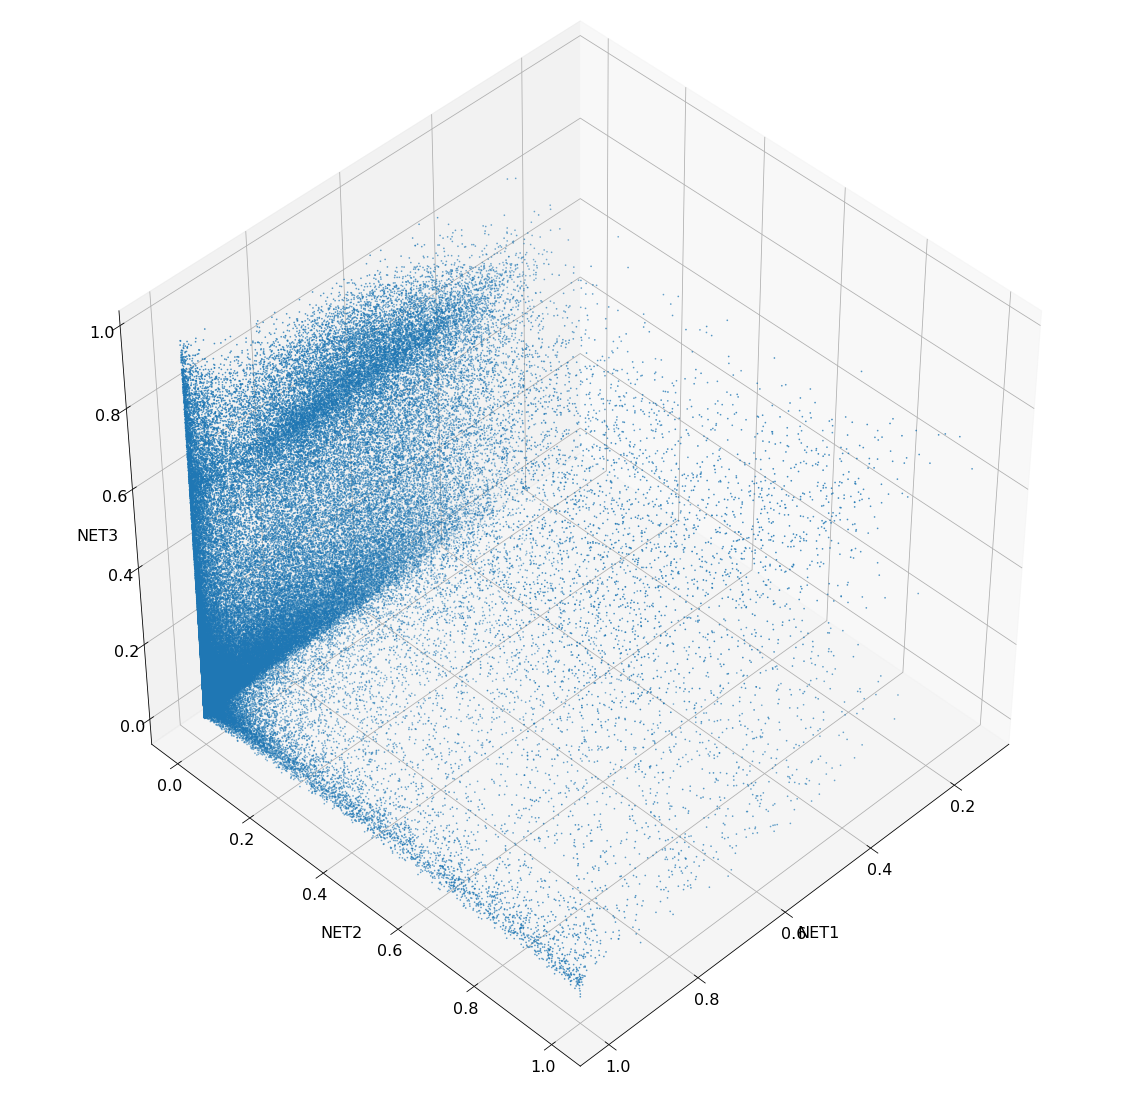

In [88]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(data_c['preds']['n1'], data_c['preds']['n2_3'], data_c['preds']['n3'],s =0.5,c= colors[0])
ax.set_xlabel('NET1')
ax.set_ylabel('NET2')
ax.set_zlabel('NET3')
ax.view_init(45, 45)
plt.show()

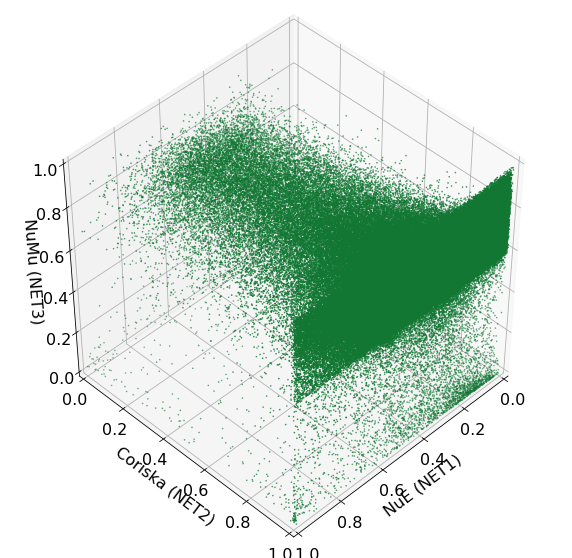

In [156]:
fig = plt.figure(figsize = (10,10),facecolor ='w')
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(data_e['preds']['n1'], data_e['preds']['n2_3'], data_e['preds']['n3'],s =0.4,c = colors[3])
ax.set_xlim(0., 1)
ax.set_ylim(0., 1)
ax.set_zlim(0., 1)
ax.set_xlabel('NuE (NET1)')
ax.set_ylabel('Coriska (NET2)')
ax.set_zlabel('NuMu (NET3)')
ax.zaxis.set_rotate_label(True) 
#ax.set_zticks([0.8, 0.9, 1])
#ax.set_xticks([0.99, 0.995, 1])
#ax.set_yticks([0.9, 0.95, 1])
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.view_init(45, 45)
plt.show()

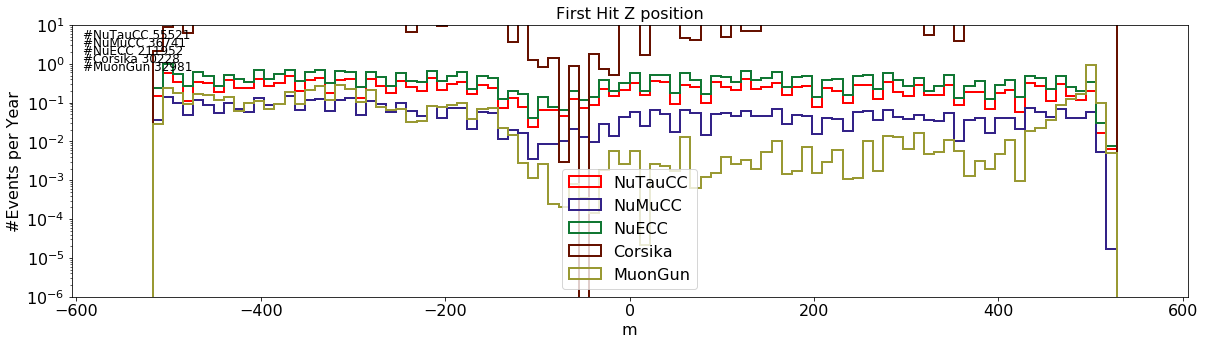

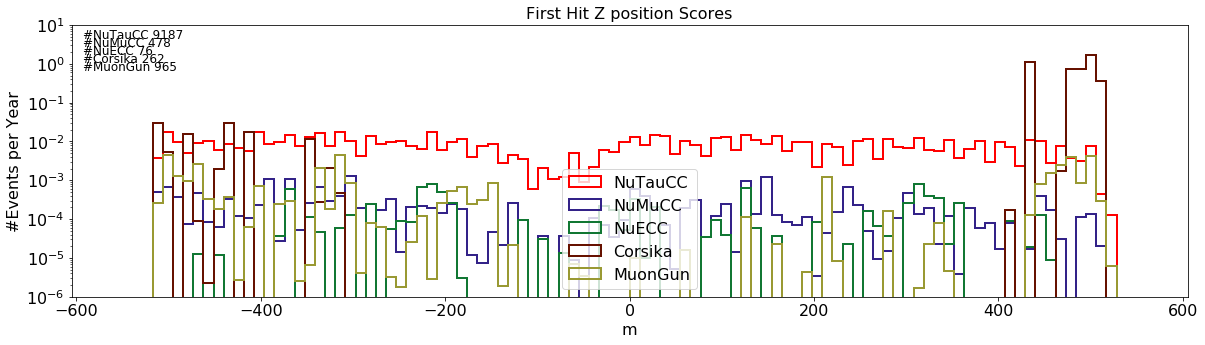

In [180]:
PlotW2("First Hit Z position", "m", data_t['logan_veto']['FirstHitZ'],data_m['logan_veto']['FirstHitZ'],
       data_e['logan_veto']['FirstHitZ'],data_c['logan_veto']['FirstHitZ'],data_g['logan_veto']['FirstHitZ'],
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year,
       b =100, r=[-550,550])
PlotW2("First Hit Z position Scores", "m", data_t['logan_veto']['FirstHitZ'][masks_t],data_m['logan_veto']['FirstHitZ'][masks_m],
       data_e['logan_veto']['FirstHitZ'][masks_e],data_c['logan_veto']['FirstHitZ'][masks_c],data_g['logan_veto']['FirstHitZ'][masks_g],
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],data_c['weight_val'][masks_c]*secs_per_year,
       data_g['weight_val'][masks_g]*secs_per_year,b =100, r=[-550,550])

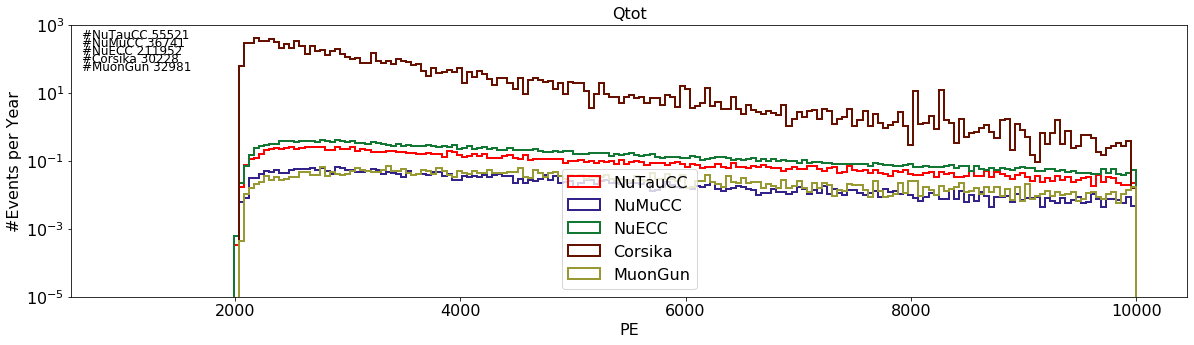

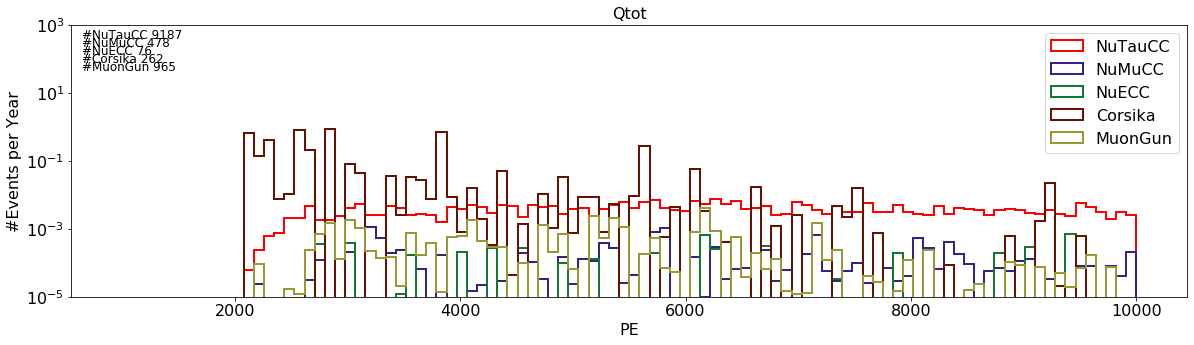

In [183]:
PlotW2("Qtot", "PE", data_t['qtot'],data_m['qtot'],data_e['qtot'],data_c['qtot'],data_g['qtot'],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,
       data_g['weight_val']*secs_per_year, r=[1000,10000])
PlotW2("Qtot", "PE", data_t['qtot'][masks_t],data_m['qtot'][masks_m],data_e['qtot'][masks_e],data_c['qtot'][masks_c],data_g['qtot'][masks_g],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c]*secs_per_year,data_g['weight_val'][masks_g]*secs_per_year, b =100,r=[1000,10000], loc =1)

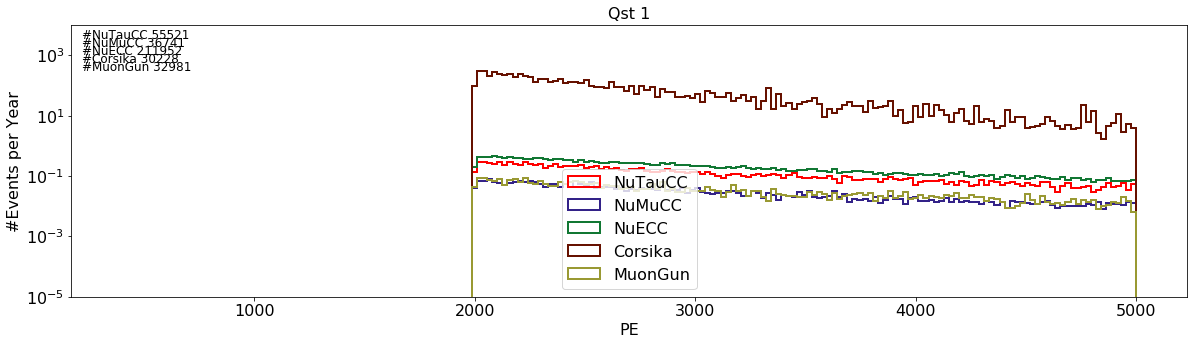

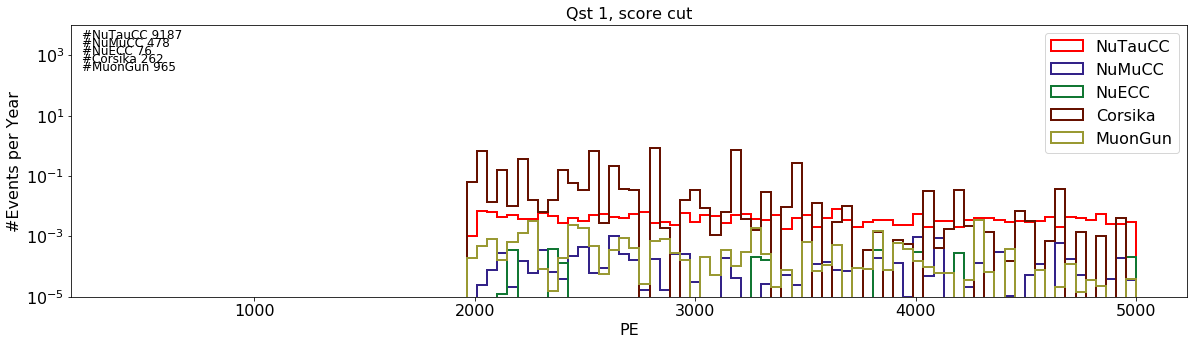

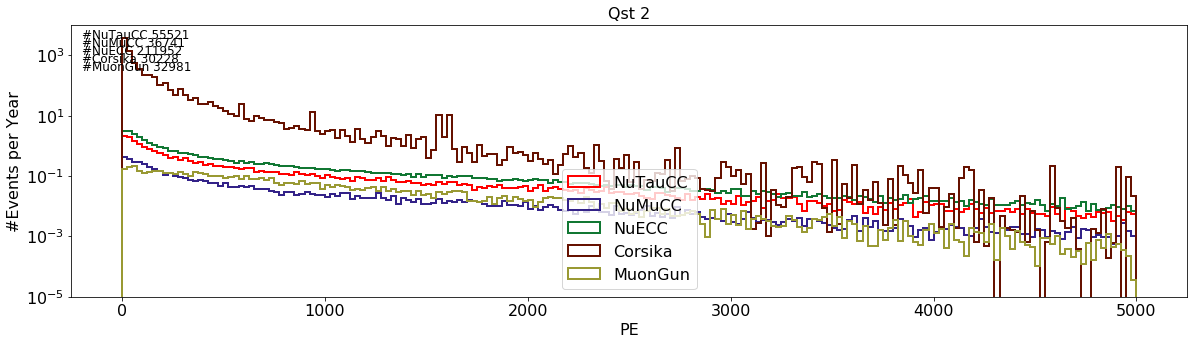

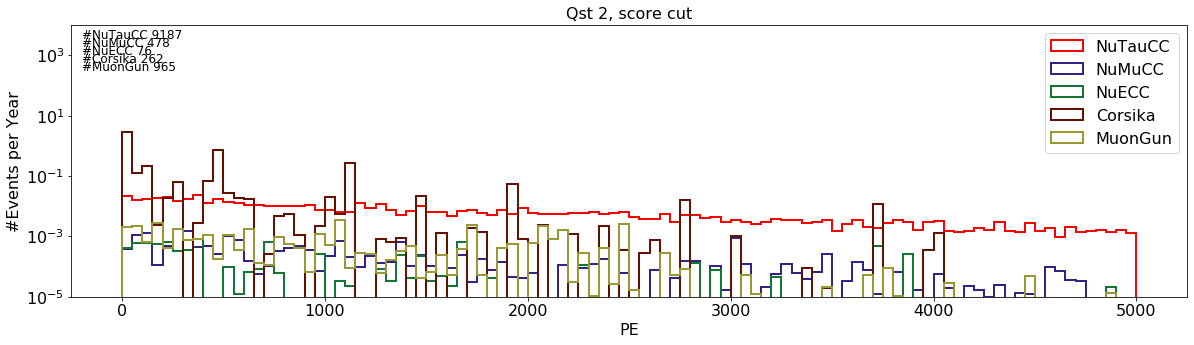

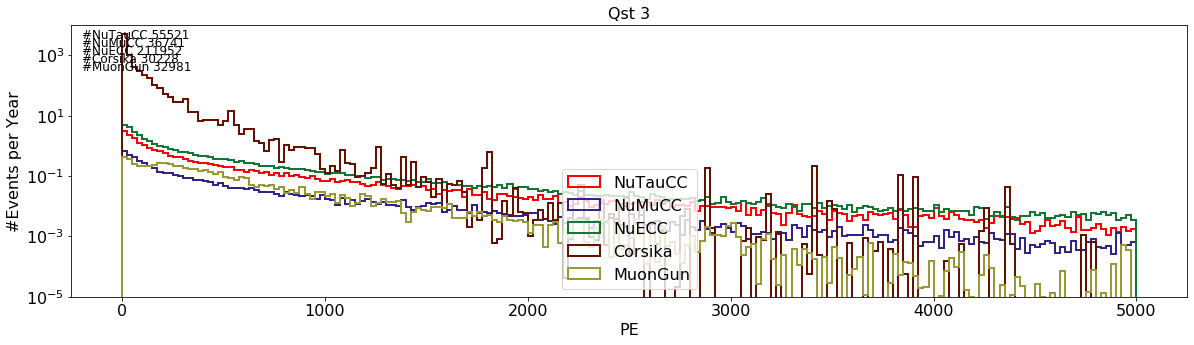

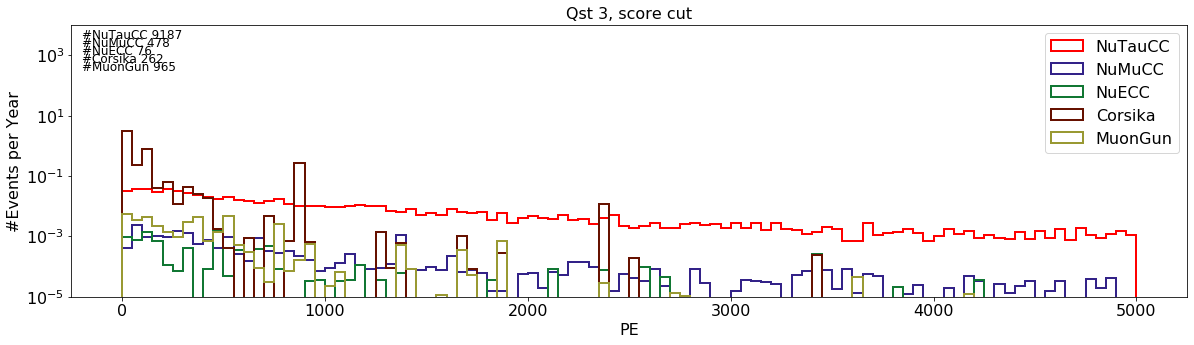

In [186]:
PlotW2("Qst 1", "PE", data_t['qst']['q'][:,0],data_m['qst']['q'][:,0],data_e['qst']['q'][:,0],data_c['qst']['q'][:,0],data_g['qst']['q'][:,0],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year, r=[400,5000])

PlotW2("Qst 1, score cut", "PE", data_t['qst']['q'][:,0][masks_t],data_m['qst']['q'][:,0][masks_m],\
       data_e['qst']['q'][:,0][masks_e],data_c['qst']['q'][:,0][masks_c],data_g['qst']['q'][:,0][masks_g],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c]*secs_per_year,data_g['weight_val'][masks_g]*secs_per_year, b =100, r=[400,5000],loc =1)

PlotW2("Qst 2", "PE", data_t['qst']['q'][:,1],data_m['qst']['q'][:,1],data_e['qst']['q'][:,1],data_c['qst']['q'][:,1],data_g['qst']['q'][:,1],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year, data_g['weight_val']*secs_per_year, r=[0,5000])

PlotW2("Qst 2, score cut", "PE", data_t['qst']['q'][:,1][masks_t],data_m['qst']['q'][:,1][masks_m],\
       data_e['qst']['q'][:,1][masks_e],data_c['qst']['q'][:,1][masks_c],data_g['qst']['q'][:,1][masks_g],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],\
       data_c['weight_val'][masks_c]*secs_per_year, data_g['weight_val'][masks_g]*secs_per_year, b =100, r=[0,5000],loc =1)

PlotW2("Qst 3", "PE", data_t['qst']['q'][:,2],data_m['qst']['q'][:,2],data_e['qst']['q'][:,2],data_c['qst']['q'][:,2],data_g['qst']['q'][:,2],\
       data_t['weight_val'],data_m['weight_val'],data_e['weight_val'],data_c['weight_val']*secs_per_year,data_g['weight_val']*secs_per_year, r=[0,5000])

PlotW2("Qst 3, score cut", "PE", data_t['qst']['q'][:,2][masks_t],data_m['qst']['q'][:,2][masks_m],\
       data_e['qst']['q'][:,2][masks_e],data_c['qst']['q'][:,2][masks_c],data_g['qst']['q'][:,2][masks_g],\
       data_t['weight_val'][masks_t],data_m['weight_val'][masks_m],data_e['weight_val'][masks_e],
       data_c['weight_val'][masks_c]*secs_per_year,data_g['weight_val'][masks_g]*secs_per_year, b =100,  r=[0,5000],loc =1)

In [160]:
llh = -0.1
Qt  = 2000 
maskl_t = data_t['logan_veto']['SPE_rlogl']-data_t['logan_veto']['Cascade_rlogl'] > llh
maskl_m = data_m['logan_veto']['SPE_rlogl']-data_m['logan_veto']['Cascade_rlogl'] > llh
maskl_e = data_e['logan_veto']['SPE_rlogl']-data_e['logan_veto']['Cascade_rlogl'] > llh
maskl_c = data_c['logan_veto']['SPE_rlogl']-data_c['logan_veto']['Cascade_rlogl'] > llh
maskl_g = data_g['logan_veto']['SPE_rlogl']-data_g['logan_veto']['Cascade_rlogl'] > llh

maskq1_t = data_t['qst']['q'][:,0] > Qst1
maskq1_m = data_m['qst']['q'][:,0] > Qst1
maskq1_e = data_e['qst']['q'][:,0] > Qst1
maskq1_c = data_c['qst']['q'][:,0] > Qst1 
maskq1_g = data_g['qst']['q'][:,0] > Qst1 

mask_init_t = maskl_t & maskq1_t
mask_init_m = maskl_m & maskq1_m
mask_init_e = maskl_e & maskq1_e
mask_init_c = maskl_c & maskq1_c
mask_init_g = maskl_g & maskq1_g

GetRatesM("Rates after NET1 and NET3 and Qst1 cut",0.99,0.8,"n1","n3","more","more",maskq1_t,maskq1_m,maskq1_e,maskq1_c,maskq1_g)
GetRatesM("Rates after NET1 and NET3 and LLH cut",0.99,0.8,"n1","n3","more","more",maskl_t,maskl_m,maskl_e,maskl_c,maskl_g)
GetRatesM("Rates after NET1 and NET3 and LLH cut",0.99,0.8,"n1","n3","more","more",mask_init_t,mask_init_m,mask_init_e,mask_init_c,mask_init_g)

print(maskl_t.shape)
data_t = data_t[mask_init_t]
data_m = data_m[mask_init_m]
data_e = data_e[mask_init_e]
data_c = data_c[mask_init_c]
data_g = data_g[mask_init_g]

corsika events  (262,)
Rates after NET1 and NET3 and Qst1 cut
NuTauCC = 0.754 +/- 0.015
NuMuCC =  0.019 +/- 0.002
NuECC =   0.009 +/- 0.002
Corsika =   4.704 +/- 1.426
MuonGun =   0.039 +/- 0.006
corsika events  (384,)
Rates after NET1 and NET3 and LLH cut
NuTauCC = 0.839 +/- 0.016
NuMuCC =  0.027 +/- 0.003
NuECC =   0.013 +/- 0.002
Corsika =   54.253 +/- 20.027
MuonGun =   0.109 +/- 0.013
corsika events  (262,)
Rates after NET1 and NET3 and LLH cut
NuTauCC = 0.754 +/- 0.015
NuMuCC =  0.019 +/- 0.002
NuECC =   0.009 +/- 0.002
Corsika =   4.704 +/- 1.426
MuonGun =   0.039 +/- 0.006
(107876,)


In [199]:
GetRates("Rates after NET1 and NET3",0.99,0.8,"n1","n3","more","more")
Qt,Qst1,Qst2,Qst3 = 1000,2000,50,50
contain = 0 #10
b = 420
m = -1./3.
bottomz = -200
bottome = 10
Zpos = 425

N2 = 0.999
maskCNN_t = (data_t['preds']['n2_3'] >= N2) 
maskCNN_m = (data_m['preds']['n2_3'] >= N2) 
maskCNN_e = (data_e['preds']['n2_3'] >= N2) 
maskCNN_c = (data_c['preds']['n2_3'] >= N2) 
maskCNN_g = (data_g['preds']['n2_3'] >= N2) 
GetRatesM("Rates after NET1 and NET3 and NET2",0.99,0.8,"n1","n3","more","more",maskCNN_t,maskCNN_m,maskCNN_e,maskCNN_c,maskCNN_g)


maskz_t = data_t['logan_veto']['FirstHitZ'] < Zpos
maskz_m = data_m['logan_veto']['FirstHitZ'] < Zpos
maskz_e = data_e['logan_veto']['FirstHitZ'] < Zpos
maskz_c = data_c['logan_veto']['FirstHitZ'] < Zpos
maskz_g = data_g['logan_veto']['FirstHitZ'] < Zpos

GetRatesM("Rates after NET1 and NET3 and Zpos cut",0.99,0.8,"n1","n3","more","more",maskz_t,maskz_m,maskz_e,maskz_c,maskz_g)
#PlotW2("First Hit Z position", "m", data_t['logan_veto']['FirstHitZ'][maskz_t & masks_t],data_m['logan_veto']['FirstHitZ'][maskz_m  & masks_m],data_e['logan_veto']['FirstHitZ'][maskz_e & masks_e],\
#       data_c['logan_veto']['FirstHitZ'][maskz_c & masks_c],data_t['weight_val'][maskz_t & masks_t],data_m['weight_val'][maskz_m & masks_m],data_e['weight_val'][maskz_e & masks_e],data_c['weight_val'][maskz_c & masks_c], b =100, r=[-550,550])
#print(maskz_t.shape)

maskq0_t = data_t['qtot'] > Qt 
maskq0_m = data_m['qtot'] > Qt
maskq0_e = data_e['qtot'] > Qt 
maskq0_c = data_c['qtot'] > Qt
maskq0_g = data_g['qtot'] > Qt
print(sum(maskq0_c))
GetRatesM("Rates after NET1 and NET3 and Qtot cut",0.99,0.8,"n1","n3","more","more",maskq0_t,maskq0_m,maskq0_e,maskq0_c,maskq0_g)
#print(maskq0_t.shape)

maskq1_t = data_t['qst']['q'][:,0] > Qst1
maskq1_m = data_m['qst']['q'][:,0] > Qst1
maskq1_e = data_e['qst']['q'][:,0] > Qst1
maskq1_c = data_c['qst']['q'][:,0] > Qst1 
maskq1_g = data_g['qst']['q'][:,0] > Qst1 
GetRatesM("Rates after NET1 and NET3 and Qst1 cut",0.99,0.8,"n1","n3","more","more",maskq1_t,maskq1_m,maskq1_e,maskq1_c,maskq1_g)
#print(maskq1_t.shape)

maskq2_t = data_t['qst']['q'][:,1] > Qst2  
maskq2_m = data_m['qst']['q'][:,1] > Qst2
maskq2_e = data_e['qst']['q'][:,1] > Qst2
maskq2_c = data_c['qst']['q'][:,1] > Qst2
maskq2_g = data_g['qst']['q'][:,1] > Qst2
GetRatesM("Rates after NET1 and NET3 and Qst2 cut",0.99,0.8,"n1","n3","more","more",maskq2_t,maskq2_m,maskq2_e,maskq2_c,maskq2_g)
#print(maskq2_t.shape)

maskq3_t = data_t['qst']['q'][:,2] > Qst3  
maskq3_m = data_m['qst']['q'][:,2] > Qst3
maskq3_e = data_e['qst']['q'][:,2] > Qst3
maskq3_c = data_c['qst']['q'][:,2] > Qst3 
maskq3_g = data_g['qst']['q'][:,2] > Qst3 
GetRatesM("Rates after NET1 and NET3 and Qst3 cut",0.99,0.8,"n1","n3","more","more",maskq3_t,maskq3_m,maskq3_e,maskq3_c,maskq3_g)
#print(maskq3_t.shape)

maskg_t = (data_t['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_t['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_t['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_t['logan_veto']["LeastDistanceToPolygon_Veto"] + data_t['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_m = (data_m['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_m['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_m['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_m['logan_veto']["LeastDistanceToPolygon_Veto"] +data_m['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_e = (data_e['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_e['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_e['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_e['logan_veto']["LeastDistanceToPolygon_Veto"] +data_e['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_c = (data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_c['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_c['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_c['logan_veto']["LeastDistanceToPolygon_Veto"] +data_c['logan_veto']['VHESelfVetoVertexPosZ']) < b)
maskg_g = (data_g['logan_veto']["LeastDistanceToPolygon_Veto"]>contain) &\
((data_g['logan_veto']["LeastDistanceToPolygon_Veto"]>bottome) | (data_g['logan_veto']['VHESelfVetoVertexPosZ']>bottomz)) &\
((m * data_g['logan_veto']["LeastDistanceToPolygon_Veto"] +data_g['logan_veto']['VHESelfVetoVertexPosZ']) < b)

GetRatesM("Rates after NET1 and NET3 and Geometry cut",0.99,0.8,"n1","n3","more","more",maskg_t,maskg_m,maskg_e,maskg_c,maskg_g)
#print(maskg_t.shape)


mask_t = maskq0_t & maskq1_t & maskq2_t & maskq3_t & maskz_t & maskg_t
mask_m = maskq0_m & maskq1_m & maskq2_m & maskq3_m & maskz_m & maskg_m
mask_e = maskq0_e & maskq1_e & maskq2_e & maskq3_e & maskz_e & maskg_e
mask_c = maskq0_c & maskq1_c & maskq2_c & maskq3_c & maskz_c & maskg_c
mask_g = maskq0_g & maskq1_g & maskq2_g & maskq3_g & maskz_g & maskg_g
GetRatesM("Rates after NET1 and NET3 and All cuts",0.99,0.8,"n1","n3","more","more",mask_t,mask_m,mask_e,mask_c,mask_g)
#print(mask_t.shape)


corsika events  (262,)
Rates after NET1 and NET3
NuTauCC = 0.754 +/- 0.015
NuMuCC =  0.019 +/- 0.002
NuECC =   0.009 +/- 0.002
Corsika =   4.704 +/- 1.426
MuonGun =   0.039 +/- 0.006
corsika events  (0,)
Rates after NET1 and NET3 and NET2
NuTauCC = 0.566 +/- 0.013
NuMuCC =  0.013 +/- 0.002
NuECC =   0.007 +/- 0.001
Corsika =   0.000 +/- 0.000
MuonGun =   0.001 +/- 0.001
corsika events  (54,)
Rates after NET1 and NET3 and Zpos cut
NuTauCC = 0.707 +/- 0.014
NuMuCC =  0.019 +/- 0.002
NuECC =   0.008 +/- 0.002
Corsika =   0.115 +/- 0.043
MuonGun =   0.024 +/- 0.005
30228
corsika events  (262,)
Rates after NET1 and NET3 and Qtot cut
NuTauCC = 0.754 +/- 0.015
NuMuCC =  0.019 +/- 0.002
NuECC =   0.009 +/- 0.002
Corsika =   4.704 +/- 1.426
MuonGun =   0.039 +/- 0.006
corsika events  (262,)
Rates after NET1 and NET3 and Qst1 cut
NuTauCC = 0.754 +/- 0.015
NuMuCC =  0.019 +/- 0.002
NuECC =   0.009 +/- 0.002
Corsika =   4.704 +/- 1.426
MuonGun =   0.039 +/- 0.006
corsika events  (248,)
Rates after

In [13]:
data_t = data_t[mask_t]
data_m = data_m[mask_m]
data_e = data_e[mask_e]
data_c = data_c[mask_c]

GetRates("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")
GetRatesM("Rates after NET1 and NET3 and All cuts",0.99,0.8,"n1","n4","more","more",mask_t,mask_m,mask_e,mask_c)